In [34]:
# –ò–º–ø–æ—Ä—Ç—ã

import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score

import joblib

SEED = 42
random.seed(SEED)
np.random.seed(SEED)

In [35]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞

df = pd.read_csv('spotify_songs.csv')

print(f'–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {df.shape}')
print('\n–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:')
df.head()

–†–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (32833, 23)

–ü–µ—Ä–≤—ã–µ 5 —Å—Ç—Ä–æ–∫ –¥–∞—Ç–∞—Å–µ—Ç–∞:


track_id                                         track_name  \
0  6f807x0ima9a1j3VPbc7VN  I Don't Care (with Justin Bieber) - Loud Luxur...   
1  0r7CVbZTWZgbTCYdfa2P31                    Memories - Dillon Francis Remix   
2  1z1Hg7Vb0AhHDiEmnDE79l                    All the Time - Don Diablo Remix   
3  75FpbthrwQmzHlBJLuGdC7                  Call You Mine - Keanu Silva Remix   
4  1e8PAfcKUYoKkxPhrHqw4x            Someone You Loved - Future Humans Remix   

       track_artist  track_popularity          track_album_id  \
0        Ed Sheeran                66  2oCs0DGTsRO98Gh5ZSl2Cx   
1          Maroon 5                67  63rPSO264uRjW1X5E6cWv6   
2      Zara Larsson                70  1HoSmj2eLcsrR0vE9gThr4   
3  The Chainsmokers                60  1nqYsOef1yKKuGOVchbsk6   
4     Lewis Capaldi                69  7m7vv9wlQ4i0LFuJiE2zsQ   

                                    track_album_name track_album_release_date  \
0  I Don't Care (with Justin Bieber) [Loud Luxury...               2019-06-14   
1                    Memories (Dillon Francis Remix)               2019-12-13   
2                    All the Time (Don Diablo Remix)               2019-07-05   
3                        Call You Mine - The Remixes               2019-07-19   
4            Someone You Loved (Future Humans Remix)               2019-03-05   

  playlist_name             playlist_id playlist_genre  ... key  loudness  \
0     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   6    -2.634   
1     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...  11    -4.969   
2     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -3.432   
3     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   7    -3.778   
4     Pop Remix  37i9dQZF1DXcZDD7cfEKhW            pop  ...   1    -4.672   

   mode  speechiness  acousticness  instrumentalness  liveness  valence  \
0     1       0.0583        0.1020          0.000000    0.0653    0.518   
1     1       0.0373        0.0724          0.004210    0.3570    0.693   
2     0       0.0742        0.0794          0.000023    0.1100    0.613   
3     1       0.1020        0.0287          0.000009    0.2040    0.277   
4     1       0.0359        0.0803          0.000000    0.0833    0.725   

     tempo  duration_ms  
0  122.036       194754  
1   99.972       162600  
2  124.008       176616  
3  121.956       169093  
4  123.976       189052  

[5 rows x 23 columns]

In [47]:
# –û–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ —á–∏—Å–ª–æ–≤—ã—Ö –∏ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –ø—Ä–∏–∑–Ω–∞–∫–æ–≤

required_numeric_cols = ['danceability', 'energy', 'key', 'loudness', 'mode',
                         'speechiness', 'acousticness', 'instrumentalness',
                         'liveness', 'valence', 'tempo', 'duration_ms']

available_numeric_cols = [c for c in required_numeric_cols if c in df.columns]
if not available_numeric_cols:
    raise ValueError('–ù–µ –Ω–∞–π–¥–µ–Ω–æ –Ω–µ–æ–±—Ö–æ–¥–∏–º—ã—Ö —Ñ–∏—á')
print(f'–§–∏—á–∏: {available_numeric_cols}')

text_cols = [c for c in ['track_name','track_artist','track_album_name','playlist_name','playlist_genre'] if c in df.columns]
print(f'–¢–µ–∫—Å—Ç–æ–≤—ã–µ –ø–æ–ª—è: {text_cols}')

–§–∏—á–∏: ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
–¢–µ–∫—Å—Ç–æ–≤—ã–µ –ø–æ–ª—è: ['track_name', 'track_artist', 'track_album_name', 'playlist_name', 'playlist_genre']


In [48]:
# –ü—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥

imputer = SimpleImputer(strategy='median')
scaler = StandardScaler()

X_raw = df[available_numeric_cols].copy()
X_imp = pd.DataFrame(imputer.fit_transform(X_raw), columns=available_numeric_cols, index=df.index)
X_scaled = pd.DataFrame(scaler.fit_transform(X_imp), columns=available_numeric_cols, index=df.index)

X_scaled.describe().T

count          mean       std        min       25%  \
danceability      32833.0  1.385031e-16  1.000015  -4.513616 -0.633082   
energy            32833.0  4.031740e-16  1.000015  -3.860786 -0.650163   
key               32833.0 -8.330477e-17  1.000015  -1.488113 -0.934342   
loudness          32833.0  1.449955e-17  1.000015 -13.294279 -0.485713   
mode              32833.0 -6.248872e-17  1.000015  -1.141322 -1.141322   
speechiness       32833.0 -1.182687e-16  1.000015  -1.056809 -0.652121   
acousticness      32833.0  4.371505e-17  1.000015  -0.798317 -0.729565   
instrumentalness  32833.0 -7.871956e-17  1.000015  -0.377953 -0.377953   
liveness          32833.0  1.231650e-16  1.000015  -1.232390 -0.631671   
valence           32833.0  1.579801e-16  1.000015  -2.189910 -0.770177   
tempo             32833.0  1.688007e-17  1.000015  -4.493185 -0.777644   
duration_ms       32833.0  1.776736e-16  1.000015  -3.706975 -0.634779   

                       50%       75%       max  
danceability      0.118211  0.731653  2.261810  
energy            0.123714  0.781509  1.665940  
key               0.173200  1.003856  1.557627  
loudness          0.185216  0.694186  2.675185  
mode              0.876177  0.876177  0.876177  
speechiness      -0.439907  0.246089  8.004256  
acousticness     -0.432245  0.362731  3.727493  
instrumentalness -0.377881 -0.356412  4.055060  
liveness         -0.409398  0.374713  5.221943  
valence           0.006172  0.782522  2.060710  
tempo             0.040994  0.484584  4.406866  
duration_ms      -0.163786  0.464378  4.880413

In [49]:
# –£–¥–∞–ª–µ–Ω–∏–µ –≤—ã–±—Ä–æ—Å–æ–≤

iso = IsolationForest(contamination='auto', random_state=SEED)
iso.fit(X_scaled)
labels_if = iso.predict(X_scaled)
mask_inliers = labels_if == 1

df_train = df[mask_inliers].reset_index(drop=True)
X_train = X_scaled[mask_inliers].reset_index(drop=True)
print(f'–î–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤: {round(1 - mask_inliers.mean(), 3)}')
print(f'–î–æ–ª—è –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è: {round(mask_inliers.mean(), 3)}')
print(f'–ù–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: {X_train.shape}')

–î–æ–ª—è –≤—ã–±—Ä–æ—Å–æ–≤: 0.181
–î–æ–ª—è –æ—Å—Ç–∞–≤—à–∏—Ö—Å—è: 0.819
–ù–æ–≤—ã–π —Ä–∞–∑–º–µ—Ä –¥–∞—Ç–∞—Å–µ—Ç–∞: (26901, 12)


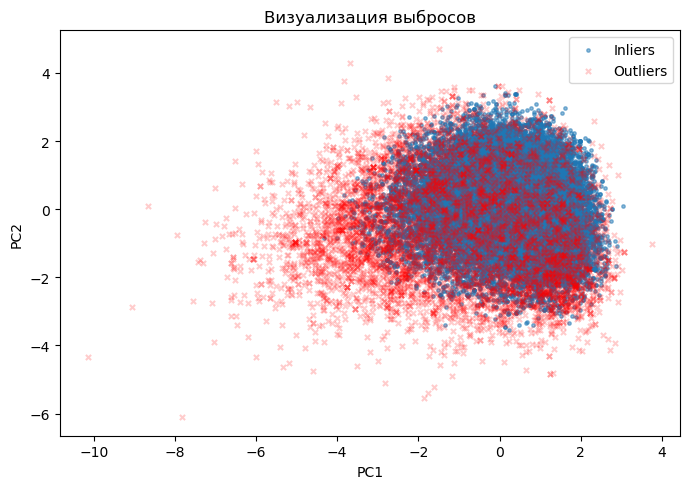

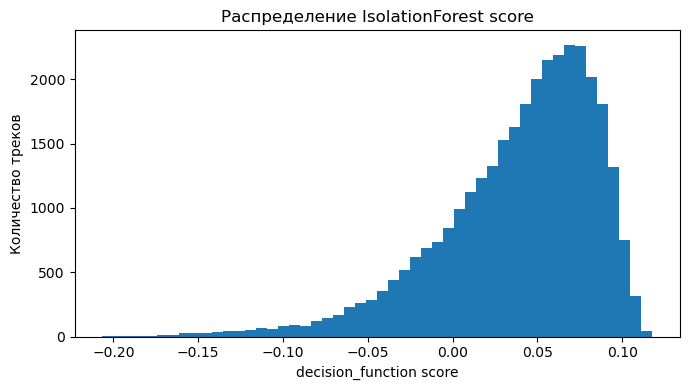

In [50]:
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–ª—è –≤—ã–±—Ä–æ—Å–æ–≤

pca = PCA(n_components=2, random_state=SEED)
X_emb = pca.fit_transform(X_scaled)

inliers = mask_inliers
outliers = ~mask_inliers

plt.figure(figsize=(7,5))
plt.scatter(X_emb[inliers, 0], X_emb[inliers, 1],
            s=6, alpha=0.5, label='Inliers')
plt.scatter(X_emb[outliers, 0], X_emb[outliers, 1],
            s=14, alpha=0.2, marker='x', color='red', label='Outliers')
plt.title('–í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –≤—ã–±—Ä–æ—Å–æ–≤')
plt.xlabel('PC1'); plt.ylabel('PC2')
plt.legend()
plt.tight_layout()
plt.show()

if_scores = iso.decision_function(X_scaled)
plt.figure(figsize=(7,4))
plt.hist(if_scores, bins=50)
plt.title('–†–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ IsolationForest score')
plt.xlabel('decision_function score')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–µ–∫–æ–≤')
plt.tight_layout()
plt.show()

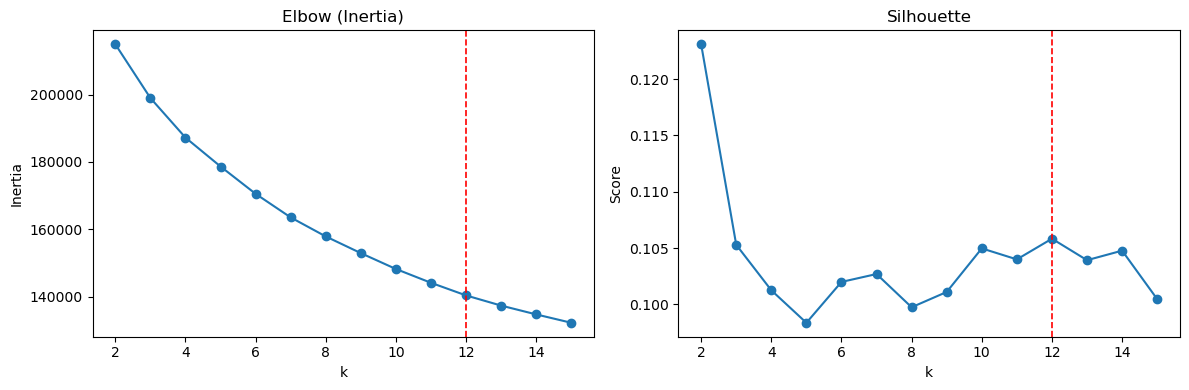

–í—ã–±—Ä–∞–Ω–æ k = 12


In [ ]:
# –ü–æ–∏—Å–∫ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

def search_k(X, k_min=2, k_max=15, random_state=SEED):
    inertias, silhouettes = [], []
    ks = list(range(k_min, k_max + 1))
    for k in ks:
        km = KMeans(n_clusters=k, n_init=20, random_state=random_state)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        try:
            sil = silhouette_score(X, labels)
        except Exception:
            sil = np.nan
        silhouettes.append(sil)
    return ks, inertias, silhouettes

ks, inertias, silhouettes = search_k(X_train, k_min=2, k_max=15)

valid = ~pd.isna(silhouettes)
if valid.any():
    ks_valid  = np.array(ks)[valid]
    sil_valid = np.array(silhouettes)[valid]
    mask = ks_valid >= 3
    best_k = ks_valid[mask][np.argmax(sil_valid[mask])] if mask.any() else ks_valid[np.argmax(sil_valid)]
else:
    rel_drop = np.diff(inertias) / np.maximum(inertias[:-1], 1e-9)
    elbow_idx = np.where(np.abs(rel_drop) < 0.1)[0]
    best_k = ks[elbow_idx[0] + 1] if len(elbow_idx) else 8

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].plot(ks, inertias, 'o-')
axes[0].set_title('Elbow (Inertia)')
axes[0].set_xlabel('k'); axes[0].set_ylabel('Inertia')

axes[1].plot(ks, silhouettes, 'o-')
axes[1].set_title('Silhouette')
axes[1].set_xlabel('k'); axes[1].set_ylabel('Score')

for ax in axes:
    ax.axvline(best_k, linestyle="--", color="red", linewidth=1.2)

plt.tight_layout()
plt.show()

print(f"–í—ã–±—Ä–∞–Ω–æ k = {best_k}")

In [52]:
# –û–±—É—á–µ–Ω–∏–µ –º–æ–¥–µ–ª–∏

kmeans = KMeans(n_clusters=int(best_k), n_init=20, random_state=SEED)
kmeans.fit(X_train)
labels_all = kmeans.predict(X_scaled)
df = df.copy()
df['cluster'] = labels_all
df['cluster'].value_counts().sort_index()

cluster
0     3372
1     1990
2     3049
3     1767
4     2767
5     3023
6     2143
7     2997
8     3310
9     2347
10    3054
11    3014
Name: count, dtype: int64

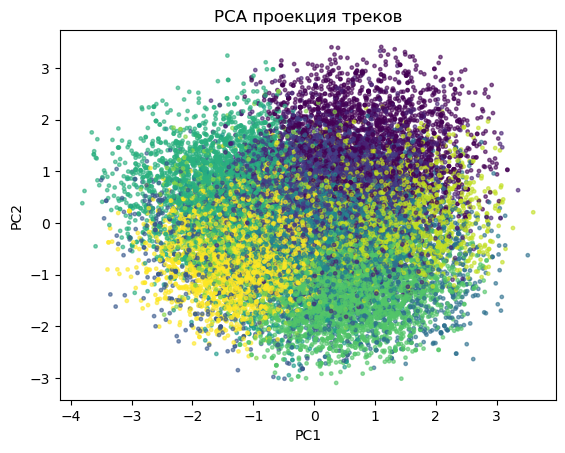

PC1       PC2
danceability      0.520216 -0.232595
acousticness      0.308063  0.154896
valence           0.288243 -0.324337
speechiness       0.150028 -0.191340
key               0.076509 -0.488776
duration_ms       0.007188  0.128352
instrumentalness -0.072285 -0.009072
mode             -0.108339  0.557119
liveness         -0.227110 -0.115347
loudness         -0.323338 -0.286737
tempo            -0.373076 -0.042254
energy           -0.459020 -0.341984

In [ ]:
# PCA –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

pca = PCA(n_components=2, random_state=SEED)
X_emb = pca.fit_transform(X_train)

plt.figure()
plt.scatter(X_emb[:,0], X_emb[:,1], c=df.loc[mask_inliers, 'cluster'].values, s=6, alpha=0.6)
plt.title('PCA –ø—Ä–æ–µ–∫—Ü–∏—è —Ç—Ä–µ–∫–æ–≤')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

loadings = pd.DataFrame(pca.components_.T, 
                        columns=['PC1', 'PC2'], 
                        index=available_numeric_cols)
loadings.sort_values('PC1', ascending=False)

In [54]:
# –°–æ—Ö—Ä–∞–Ω–µ–Ω–∏–µ —Ñ–∞–π–ª–æ–≤

joblib.dump(imputer, 'imputer.joblib')
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(kmeans, 'kmeans_model.joblib')

df.to_csv('spotify_with_clusters.csv', index=False)

In [57]:
# –†–µ–∫–æ–º–µ–Ω–¥–∞—Ç–µ–ª—å–Ω–∞—è —Å–∏—Å—Ç–µ–º–∞

def _match_tracks(df: pd.DataFrame, track_query: str, artist_query: str=None, top_k: int=5):
    mask = pd.Series([True]*len(df))
    if 'track_name' in df.columns and track_query:
        mask &= df['track_name'].astype(str).str.contains(track_query, case=False, na=False)
    if artist_query and 'track_artist' in df.columns:
        mask &= df['track_artist'].astype(str).str.contains(artist_query, case=False, na=False)
    candidates = df[mask]
    def score_row(r):
        s = 0
        tn = str(r.get('track_name','')).lower()
        ar = str(r.get('track_artist','')).lower()
        if track_query and track_query.lower() in tn: s += 2
        if artist_query and artist_query.lower() in ar: s += 2
        return s
    candidates = candidates.copy()
    if not candidates.empty:
        candidates['__score'] = candidates.apply(score_row, axis=1)
        candidates = candidates.sort_values(['__score'], ascending=False)
    return candidates.head(top_k)

def recommend_by_track_name(track_query: str, artist_query: str=None, n_recs: int=10, random_state: int=42):
    rng = np.random.default_rng(random_state)
    candidates = _match_tracks(df, track_query, artist_query, top_k=5)
    if candidates.empty:
        print('–¢—Ä–µ–∫ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ –Ω–µ –Ω–∞–π–¥–µ–Ω, –Ω–µ–æ–±—Ö–æ–¥–∏–º–æ —É—Ç–æ—á–Ω–∏—Ç—å')
        return pd.DataFrame()

    picked = candidates.iloc[0]
    x = picked[available_numeric_cols].values.reshape(1, -1)
    imp = joblib.load('imputer.joblib')
    sclr = joblib.load('scaler.joblib')
    x_proc = sclr.transform(imp.transform(x))

    km = joblib.load('kmeans_model.joblib')
    cluster_id = km.predict(x_proc)[0]

    same_cluster = df[df['cluster'] == cluster_id]
    if 'track_name' in df.columns:
        same_cluster = same_cluster[~((same_cluster['track_name'] == picked.get('track_name')) &
                                      (same_cluster.get('track_artist','') == picked.get('track_artist','')))]

    if len(same_cluster) <= n_recs:
        recs = same_cluster.sample(n=len(same_cluster), random_state=random_state)
    else:
        idx = rng.choice(same_cluster.index.values, size=n_recs, replace=False)
        recs = same_cluster.loc[idx]

    cols_to_show = [c for c in ['track_name','track_artist','track_album_name','playlist_name','playlist_genre'] if c in same_cluster.columns]
    cols_to_show = cols_to_show + ['cluster']
    print(f"–í—ã–±—Ä–∞–Ω —Ç—Ä–µ–∫: {picked.get('track_name','?')} ‚Äî {picked.get('track_artist','?')} | –ö–ª–∞—Å—Ç–µ—Ä = {cluster_id}")
    return recs[cols_to_show].reset_index(drop=True)


In [58]:
recs = recommend_by_track_name(track_query='Lithium', artist_query='Nirvana', n_recs=10)
recs

–í—ã–±—Ä–∞–Ω —Ç—Ä–µ–∫: Lithium ‚Äî Nirvana | –ö–ª–∞—Å—Ç–µ—Ä = 5


c:\Users\aloeseasnn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SimpleImputer was fitted with feature names
  warnings.warn(
c:\Users\aloeseasnn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
c:\Users\aloeseasnn\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


track_name      track_artist  \
0  Meant to Be (feat. Florida Georgia Line)        Bebe Rexha   
1                                 gone girl         iann dior   
2                           Made In The USA       Demi Lovato   
3                                  Se√±orita            Reykon   
4                       Hang on to Yourself     Palaye Royale   
5                                Television      The Academic   
6                Bailando - English Version  Enrique Iglesias   
7                                 Lemontree     Julian Daniel   
8                               Loudspeaker              MUNA   
9                                  Addicted     Amy Winehouse   

                track_album_name  \
0                   Expectations   
1                 Industry Plant   
2                           Demi   
3                     El Lider 1   
4            Hang on to Yourself   
5        Tales from the Backseat   
6  SEX AND LOVE (Deluxe Edition)   
7                      Lemontree   
8                    Loudspeaker   
9                  Back To Black   

                                       playlist_name playlist_genre  cluster  
0                             Intro to Post-Teen Pop            pop        5  
1                                      Pop Hits 2020            r&b        5  
2                                  ü§©ü§™Post Teen Popü§™ü§©            pop        5  
3                                    REGGAETON VIEJO          latin        5  
4  Modern Indie Rock // Alternative Rock / Garage...           rock        5  
5                                     permanent wave           rock        5  
6                    Latest Latin American Hits 2020          latin        5  
7                          a taste of the mainstream            pop        5  
8                                   Indie Poptimism!            pop        5  
9       Soul Coffee (The Best Neo-Soul Mixtape ever)            r&b        5